In [3]:
ls

KiTS21-Test.ipynb  Swin-Seg-Result.ipynb  Swin-Segmenter.ipynb


In [58]:
import json
import matplotlib.pyplot as plt
# 데이터를 저장할 리스트 초기화
steps = []
losses = []
accuracies = []

# 파일 경로
#file_path2 = '../work_dirs/Swin-Seg/batch8lr0.001/20240606_164409/vis_data/20240606_164409.json' #210-290
file_path1 = '../work_dirs/Swin-Seg/batch24lr0.01/20240609_155647/vis_data/20240609_155647.json' #220-300
file_path3 = '../work_dirs/Swin-Seg/batch24lr0.01/20240610_022708/vis_data/20240610_022708.json'

file_path = [file_path3]

# 로그 파일 읽기
for file in file_path:
    with open(file, 'r') as f:
        for line in f:
            try:
                log = json.loads(line)
                steps.append(log.get('epoch'))
                losses.append(log.get('loss', 0))  # 'loss'가 없는 경우 기본값 0 사용
                accuracies.append(log.get('decode.acc_seg', 0))  # 'decode.acc_seg'가 없는 경우 기본값 0 사용
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")
            except KeyError as e:
                print(f"Key error: {e}")

# loss와 accuracy 시각화


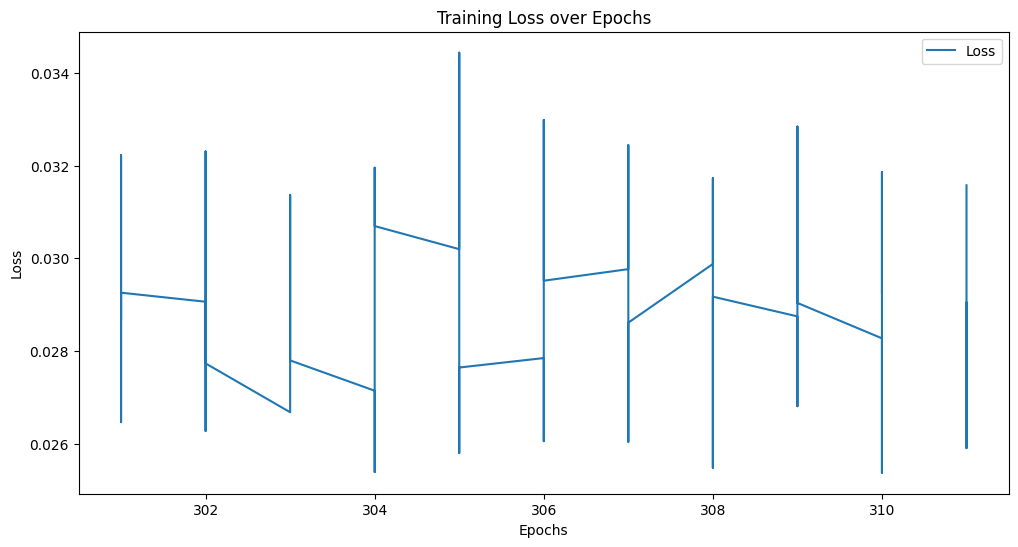

In [59]:
# loss  시각화
plt.figure(figsize=(12, 6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(steps, losses, label='Loss')
plt.tick_params(axis='y')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


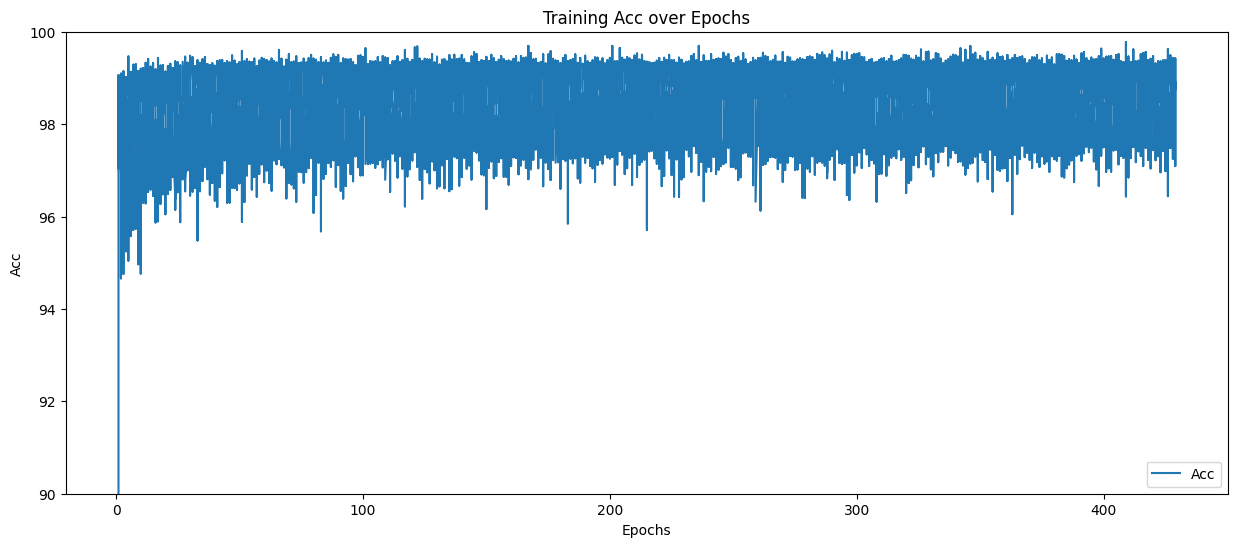

In [41]:
# loss  시각화
plt.figure(figsize=(15, 6))
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.plot(steps, accuracies, label='Acc')
plt.tick_params(axis='y')
plt.ylim(90, 100)  # y축 범위를 0에서 0.2로 설정
plt.title('Training Acc over Epochs')
plt.legend()
plt.show()


In [63]:
import json

# Load JSON objects line by line from a file
def read_json_lines(filepath):
    data = []
    with open(filepath, 'r') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data

# Read the JSON objects from both files
data1 = read_json_lines('../work_dirs/Seg_Swin_v2/batch16lr0.01epoch100/batch16lr0.01epoch100.json')
data2 = read_json_lines('../work_dirs/Seg_Swin_v2/batch16lr0.01epoch150/20240520_060216/vis_data/20240520_060216.json')

# Function to read JSON objects line by line from a file
def read_json_lines(filepath):
    data = []
    with open(filepath, 'r') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data


# Merge the datasets
merged_data = filtered_data1 + filtered_data2

for i, entry in enumerate(merged_data):
    entry['iter'] = 100 * (i + 1)

# Save the sorted and reset merged dataset to a new JSON file
output_filepath = "../work_dirs/Seg_Swin_v2/batch16lr0.01epoch150/batch16lr0.01epoch150.json"
with open(output_filepath, 'w') as output_file:
    for entry in sorted_merged_data:
        output_file.write(json.dumps(entry) + '\n')

output_filepath

'../work_dirs/Seg_Swin_v2/batch16lr0.01epoch150/batch16lr0.01epoch150.json'